In [1]:
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter

# 1. Twitch API data

The URL `https://wind-bow.glitch.me/twitch-api/channels/{CHANNEL_NAME}` is an API from twitch to get data from twitch channels.

Get the data from the following channels:

```
["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
```

To make into a dataframe that looks like this:

![](twitch.png)

In [2]:
df = pd.DataFrame()
urls = ["ESL_SC2", "OgamingSC2", "cretetion", "freecodecamp", 
    "storbeck", "habathcx", "RobotCaleb", "noobs2ninjas",
    "ninja", "shroud", "Dakotaz", "esltv_cs", "pokimane", 
    "tsm_bjergsen", "boxbox", "wtcn", "a_seagull",
    "kinggothalion", "amazhs", "jahrein", "thenadeshot", 
    "sivhd", "kingrichard"]
for i in range(0, len(urls)):
    
    url = 'https://wind-bow.glitch.me/twitch-api/channels/'+urls[i]
    
    page = requests.get(url)
    
    site = json.loads(page.content)
    
    res = {key: site[key] for key in site.keys() 
                                   & {'_id', 'display_name', 'status', 'followers', 'views'}}
    
    df = df.append(res, ignore_index=True)
    
df.dropna()  ##dropping all the unavailable streamers

,_id,display_name,followers,status,views
0,30220059.0,ESL_SC2,135394.0,RERUN: StarCraft 2 - Terminator vs. Parting (P...,60991791.0
1,71852806.0,OgamingSC2,40895.0,UnderDogs - Rediffusion - Qualifier.,20694507.0
2,90401618.0,cretetion,908.0,It's a Divison kind of Day,11631.0
3,79776140.0,FreeCodeCamp,10122.0,Greg working on Electron-Vue boilerplate w/ Ak...,163747.0
5,6726509.0,Habathcx,14.0,Massively Effective,764.0
6,54925078.0,RobotCaleb,20.0,Code wrangling,4602.0
7,82534701.0,noobs2ninjas,835.0,Building a new hackintosh for #programming and...,48102.0


# 2. App Store Reviews

The Apple app store has a `GET` API to get reviews on apps. The URL is:

```
https://itunes.apple.com/{COUNTRY_CODE}/rss/customerreviews/id={APP_ID_HERE}/page={PAGE_NUMBER}/sortby=mostrecent/json
```

Note that you need to provide:

- The country code (eg. `'us'`, `'gb'`, `'ca'`, `'au'`) 

- The app ID. This can be found in the web page for the app right after `id`. For instance, Candy Crush's US webpage is:

`https://apps.apple.com/us/app/candy-crush-saga/id553834731`

So here the ID would be `553834731`.

- The "Page Number". The request responds with multiple pages of data, but sends them one at a time. So you can cycle through the data pages for any app on any country.

### 2.1 English app reviews

Get all english reviews you can for Candy Crush, Tinder, the Facebook app and Twitter (you have to get them from all the english-speaking countries you can think of!).

### 2.2 Best version

For each app, get the version that is the best rated.

Make a visualization of the ratings per versions per app to show this.

### 2.3 Top words

Which word for each app is most common in the 5 star and in the 1-star review's titles?
|
Note: `df.title.str.get_dummies()` is your friend

Note: This might create a lot of data! Try to break down your analysis in chunks if it doesn't work.

In [3]:
df_reviews = pd.DataFrame(columns = ['app', 'title', 'author', 'rating', 'review', 'version'])

countries = ["ca", "us", "gb", "au", "ie", "nz"]
apps = [553834731, 547702041, 284882215, 333903271]

for app in apps:
    for country in countries:
        for page in range(1, 10):
            ## tried to go past page 10 but jupyter bugged out every time :/
            url = "https://itunes.apple.com/%s/rss/customerreviews/id=%d/page=%d/sortby=mostrecent/json" % (country, app, page)
            page = requests.get(url)
            site = json.loads(page.content)
            data = site.get("feed").get("entry")
            if data == None:
                continue

            for i in range(0, len(data)):
                if data[i].get('im:name'): continue

                title = data[i].get('title').get('label')
                author = data[i].get('author').get('name').get('label')
                rating = data[i].get('im:rating').get('label')
                review = data[i].get('content').get('label')
                version = data[i].get('im:version').get('label')
                new_row = {'app':app, 'title':title, 'author':author, 'rating':rating, 'review':review, 'version':version}
                df_reviews = df_reviews.append(new_row, ignore_index=True)
                continue

df_reviews.loc[df_reviews.app == 553834731, 'app'] = "Candy Crush"
df_reviews.loc[df_reviews.app == 547702041, 'app'] = "Tinder"
df_reviews.loc[df_reviews.app == 284882215, 'app'] = "Facebook"
df_reviews.loc[df_reviews.app == 333903271, 'app'] = "Twitter"
df_reviews.rating = df_reviews.rating.astype(int)
df_reviews

,app,title,author,rating,review,version
0,Candy Crush,Candy crush,Janet35kiley,4,Level 1877 is the worst level I have ever play...,1.196.0.1
1,Candy Crush,Gold bars for races,Anonymous22334455,3,I don’t like how you guys changed the prized f...,1.196.0.1
2,Candy Crush,Love the Game BUT,King queen ruler of Bananas,5,Membro Quit asking for life you make the game ...,1.196.0.1
3,Candy Crush,They just want you to spend lots of money.,Preet2021,1,I am not going to spend a single penny for stu...,1.196.0.1
4,Candy Crush,15 m !!!!!!!,fodfjjj,1,Il faut atantdre un 15 m a la con pour se juex...,1.196.0.1
...,...,...,...,...,...,...
10795,Twitter,تويتر,معاذ 1994,1,اصدار سيء جداً,6.1
10796,Twitter,Tweet this,Taknz123,5,"Twitter app works a charm on 4-5s I love it, i...",6.1
10797,Twitter,Good,AboRanim,5,Good,6.1
10798,Twitter,Great!!!,Mad-Hatter13,5,This is a great app! Simple but great and gets...,6.1


In [4]:
df_reviews.loc[df_reviews.app == "Candy Crush"].groupby(by=['version']).mean().sort_values(by=['rating'], ascending=False)

,rating
version,
1.150.1,5.000000
1.151.0,5.000000
1.105.1,5.000000
1.90.1,5.000000
1.106.0,5.000000
...,...
1.147.0,2.666667
1.165.2,2.416667
1.169.1.1,2.375000


<AxesSubplot:xlabel='index', ylabel='rating'>

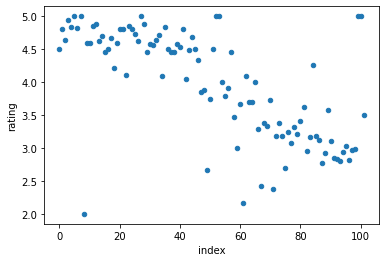

In [5]:
df_reviews.loc[df_reviews.app == "Candy Crush"].groupby(by=['version']).mean().reset_index().reset_index().plot.scatter(x='index', y='rating')

In [6]:
df_reviews.loc[df_reviews.app == "Tinder"].groupby(by=['version']).mean().sort_values(by=['rating'], ascending=False)

,rating
version,
11.0.2,5.000000
7.8.0,5.000000
6.6.1,5.000000
7.3.0,4.800000
6.9.0,4.333333
...,...
8.3.0,1.000000
11.20.0,1.000000
8.12.1,1.000000


<AxesSubplot:xlabel='index', ylabel='rating'>

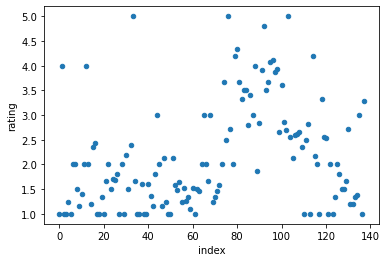

In [7]:
df_reviews.loc[df_reviews.app == "Tinder"].groupby(by=['version']).mean().reset_index().reset_index().plot.scatter(x='index', y='rating')

In [8]:
df_reviews.loc[df_reviews.app == "Facebook"].groupby(by=['version']).mean().sort_values(by=['rating'], ascending=False)

,rating
version,
156.0,5.0
158.0,5.0
223.0,5.0
190.0,4.0
197.0,4.0
...,...
180.0,1.0
274.0,1.0
243.0,1.0


<AxesSubplot:xlabel='index', ylabel='rating'>

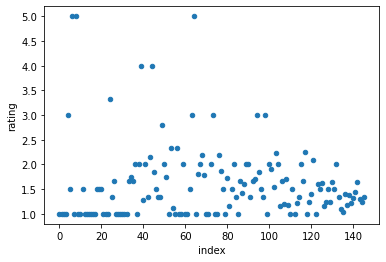

In [9]:
df_reviews.loc[df_reviews.app == "Facebook"].groupby(by=['version']).mean().reset_index().reset_index().plot.scatter(x='index', y='rating')

In [10]:
df_reviews.loc[df_reviews.app == "Twitter"].groupby(by=['version']).mean().sort_values(by=['rating'], ascending=False)

,rating
version,
6.37.2,5.0
6.29,5.0
7.7,5.0
7.60,5.0
6.7.2,5.0
...,...
8.25,1.0
7.22.3,1.0
8.27,1.0


<AxesSubplot:xlabel='index', ylabel='rating'>

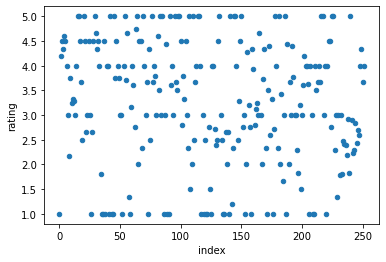

In [11]:
df_reviews.loc[df_reviews.app == "Twitter"].groupby(by=['version']).mean().reset_index().reset_index().plot.scatter(x='index', y='rating')

In [12]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Candy Crush") & (df_reviews.rating == 1)].title).split()).most_common(1)

[('to', 55)]

In [13]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Candy Crush") & (df_reviews.rating == 5)].title).split()).most_common(1)

[('Candy', 207)]

In [14]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Tinder") & (df_reviews.rating == 1)].title).split()).most_common(1)

[('for', 268)]

In [15]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Tinder") & (df_reviews.rating == 5)].title).split()).most_common(1)

[('app', 20)]

In [16]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Facebook") & (df_reviews.rating == 1)].title).split()).most_common(1)

[('Facebook', 144)]

In [17]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Facebook") & (df_reviews.rating == 5)].title).split()).most_common(1)

[('Good', 9)]

In [18]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Twitter") & (df_reviews.rating == 1)].title).split()).most_common(1)

[('Twitter', 126)]

In [19]:
Counter(" ".join(df_reviews.loc[(df_reviews.app == "Twitter") & (df_reviews.rating == 5)].title).split()).most_common(1)

[('Twitter', 120)]

# 3 (STRETCH) IMDB scraping

IMDB has structured web pages. We can exploit this to scrape movie data.

Usinf the following URL:

`https://www.imdb.com/search/title/?groups=top_1000&start={PAGE_NUMBER}&ref_=adv_nxt`

With the following headers in your `GET` request: `{"Accept-Language": "en-US,en;q=0.5"}`

You can generate a dataframe like this one by cycling over the page numbers in the URL requested:

![](IMDB.png)

Note that the following  page attribues will be of interest:

- `div` with a class of `lister-item mode-advanced`

- Various `span` objects within that `div` like `lister-item-year` and `runtime` and `metascore`